# Projet 2: Préparation et analyse des données de Twitter

## Table des matières

<ul>
<li><a href="#intro">Introduction</a></li>   
<li><a href="#Col"> A. Collecte des données </a></li>
<li><a href="#eval">B. Evaluation des données</a></li>
<li><a href="#net">C. Nettoyage des données</a></li>
<li><a href="#stck">D. Stockage des données</a></li>
<li><a href="#avd">E. Analyse et visualisation des données</a></li>
</ul>

<a id='intro'></a>
## Introduction 

> Notre objectif dans ce projet est d'ananlyser et de visualiser les données twitter. 

<a id='Col'></a>
## A. Collecte des données

> Dans cette partie, nous allons rassembler 3 ensembles de données que nous allons recueillir dans différentes sources.
Notons que ces données serons recueillit de différentes manières.

1. Nous allons commencer par le jeu de donnée 'twitter-archive-enhanced.csv'

In [68]:
## Importation de la bibliothèque pandas et numpy 
import pandas as pd
import numpy as np

In [69]:
## Visualisation dela première base de donnée
df_1 = pd.read_csv('twitter-archive-enhanced.csv')

2. Ensuite nous allons utilisez la bibliothèque requests pour télécharger la prédiction d’image des tweet (image_predictions.tsv)

In [70]:
## Importation de la bibliothèque requests
import requests

In [71]:
## Téléchargement du jeu de donnée prédiction d'image
lien_url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' ## lien
reponse = requests.get(lien_url)
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(reponse.content) ## recuppération du fichier

3. Enfin nous allons utilisez la bibliothèque Tweepy pour interroger des données supplémentaires via l’API Twitter (tweet_json.txt)

In [72]:
### Importation de la bilbliothèque tweepy et json
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [73]:
### Recupération des données de l'api twitter 
df_3 = []

with open('tweet_json.txt',) as file:
    for line in file:
        df_3.append(json.loads(line))
    

In [74]:
### Affichage de la première colonne des données de l'api twitter
print(df_3[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [75]:
## lecture du fichier tweet_json.txt ligne par ligne dans un tableau de données pandas 
## en incluant l'ID du tweet, le nombre de retweet et le nombre de favoris:

df_3_lect = pd.DataFrame(df_3, columns = ['id', 'retweet_count','favorite_count'])

In [76]:
## lecture de l'entête 
df_3_lect.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [77]:
 ## nous voyons que dans le fichier tweet_json.txt l'id du tweet est nommé simplement 'id'
## renomons cette colonne en tweet_id 

df_3_lect = df_3_lect.rename(columns = {'id': 'tweet_id'})
df_3_lect.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='eval'></a>
## B. Evaluation des données

> Dans cette section, nous détecterons et documenterons au moins huit (8) problèmes de qualité et deux (2) problèmes de propreté.on va devoir utiliser à la fois l’évaluation programmatique d’évaluation visuelle pour évaluer les données



### Problèmes de qualité

### 1. Prour le jeud de donnée twitter-archive-enhanced.csv

1. Nous avons beaucoup de données manquantes notament dans les colonnes suivantes : in_reply_to_status_id, in_reply_to_user_id, dans lesquelles on a que 78 observations et celles de retweeted_status_id,	retweeted_status_user_id, retweeted_status_timestamp dans lesquelles on a que 181 observations. En outre, nous avons aussi le colonne expanded_urls qui contient 139 données manquantes.


2. La colonne "source" est au format html (< a >). 


3.  les types de données de la colonne tweet_id ne sont pas correctes on a des entiers au lieu des chaines de caractères.


4. le type de variable pour la colonne "timestamp" est un objet au lieu d'être en format date..



### 2.  Pour le jeu de donnée image_predictions.tsv


1. l'ensemble de la table contient des données manquantes: nous en avons 2075 au lieu de 2356


2. On a les colonnes p1, p2, p3 dont les noms sont séparés par des undescores( _ )


3. Certain noms des colones p1, p2 et p3 commencent par des lettres majiscules tandisque d'autres commencent par des lettres minuscules.


### 3. Pour le jeu de donnée tweet_json.txt


1. on a des données manquantes : 2354 au lieu de 2356

### Problèmes de propreté
1. Les données sur le stade du chien sont séparées en 4 colonnes


2. Les données que nous avons recueilli sont liées entre elle mais sont séparées en 3 jeux de données distinct 

> Dans cette partie nous allons evaluer aussi bien visuelement que par programme les problèmes de qualitée et de structure que contienent nos trois jeux de données


###### 1. Evaluation des données de l'archive Twitter WeRateDogs (twitter_archive_enhanced.csv)

In [78]:
## Afichage des 5 premières lignes
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Commentaire**: Nous pouvons voir visuellement que on beaucoup de données manquantes dans les colonnes 'n_reply_to_status_id',	'in_reply_to_user_id' etc...
On constate également que la colonne 'source' est au format html 

In [79]:
## Afichage des informations sur la base de données 
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Commentaire**: Ici on peu remarquer que on au total 17 colonnes pour 2355 lignes. 
 > La colonne 'tweet_id' est un entier alors qu'ildevait être une chaine de caractère
 > la colonne 'timestamp' est du type object alors qu'il devait être en format date
 > On voit que les colonnes 'doggo', 'floofer', 'pupper', 'puppo' sont sectionnées alors qu'il devrait être dans la même colonne

In [80]:
## Statistiques descriptives de la colonne rating_numerator
df_1.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

**Commentaire**: On voit que certaint numérateurs de votes sont très supérieur à la moyenne (1776) et certain vote ont pour numérateur 0 ce qui n'est pas tout à fait normal.

In [81]:
## Affichage du nombre de numerateurs de la colonne ratings_numerator quisont inférieur à 10
df_1[df_1.rating_numerator <10].count()[0]

440

**Commentaire**: On a 440 lignes dont le numérateur est inférieur à 10

In [82]:
## affichage des indentifiants tweet dont le numérateur est inférieur à 10
df_1[df_1.rating_numerator <10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [83]:
## Affichage du numérateur du vote de l'identifiant tweet 891327558926688256
df_1.loc[(df_1.tweet_id == 891327558926688256), 'rating_numerator']

4    12
Name: rating_numerator, dtype: int64

In [84]:
## Afichage du text de la ligne 2352
df_1.loc[2352, 'text']

'This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx'

In [85]:
## Statistiques descriptives de la colonne rating_denominator
df_1.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

**Commentaire**: On a des dénominateursqui sont inférieur à 10 et d'aurte supérieur à 10

In [86]:
## Affichage de l'identifiant tweet dont le dénominateur du vote est égale à 0
df_1[df_1.rating_denominator == 0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [87]:
## affichage des colones rating_denominator qui sont différent de 10
df_1[df_1.rating_denominator != 10].count()[0]

23

**Commentaire**:on a 23 dénominateurs qui sont différent de 10

In [88]:
## Compte desvaleur de la colonne 'name'
df_1.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

##### 2. Evaluation du jeu de données tweet  prediction d'image (image_predictions.tsv)

In [89]:
## Lecture de labase de donnée image_prédiction.tsv
df_2 = pd.read_csv('image-predictions.tsv', sep='\t')
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Commentaire**: On voit que les noms dans les colonnes p1, p2 et p3 sont séparés par des _

In [90]:
##Afichage d'une façon aléatoire 15 données
df_2.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
24,666353288456101888,https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg,1,malamute,0.336874,True,Siberian_husky,0.147655,True,Eskimo_dog,0.093412,True
1672,813112105746448384,https://pbs.twimg.com/media/C0jBJZVWQAA2_-X.jpg,1,dingo,0.287369,False,Pembroke,0.140682,True,basenji,0.090819,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
1963,867051520902168576,https://pbs.twimg.com/media/DAhiwb0XcAA8x5Q.jpg,1,Samoyed,0.471403,True,Pekinese,0.302219,True,Pomeranian,0.156606,True
482,675372240448454658,https://pbs.twimg.com/media/CV9nd30XAAAEba5.jpg,1,Chihuahua,0.416385,True,West_Highland_white_terrier,0.102933,True,Samoyed,0.087300,True
557,677687604918272002,https://pbs.twimg.com/media/CWehRdEWIAAySyO.jpg,1,Pembroke,0.573047,True,sunglasses,0.126758,False,golden_retriever,0.108047,True
257,670778058496974848,https://pbs.twimg.com/media/CU8VFhuVAAAQW8B.jpg,1,pug,0.776612,True,Brabancon_griffon,0.112032,True,boxer,0.039051,True
86,667517642048163840,https://pbs.twimg.com/media/CUN_wiBUkAAakT0.jpg,1,Italian_greyhound,0.125176,True,standard_poodle,0.084571,True,cocker_spaniel,0.081347,True
1351,759846353224826880,https://pbs.twimg.com/media/CouEOZhWAAAgFpE.jpg,1,Sussex_spaniel,0.355395,True,vizsla,0.141094,True,otterhound,0.092198,True


In [91]:
## Affichage du lien d'une image
df_2.loc[1860, 'jpg_url']

'https://pbs.twimg.com/media/C6_3QgMWsAMNnAk.jpg'

In [92]:
## Affichage d'une image
from IPython.display import Image
Image(url = 'https://pbs.twimg.com/media/C6_3QgMWsAMNnAk.jpg')

In [93]:
##affiche des information de labase de donnée
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### 3. Evaluation des données de l'API twitter 

In [94]:
## affichage des données de l'api twitter avec la colonne 'tweet_id', 'retweet_count' et 'favorite_count'
df_3_lect.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [95]:
## Affiche de 10 donnée d'une façon aléatoire 
df_3_lect.sample(10)

,tweet_id,retweet_count,favorite_count
1915,674291837063053312,6533,15817
2330,666345417576210432,146,307
618,796149749086875649,16628,36177
2143,669926384437997569,115,400
2022,671891728106971137,618,1415
953,751598357617971201,3440,8699
114,870374049280663552,27680,85011
215,850753642995093505,10352,33348
40,884441805382717440,5856,27478
791,773670353721753600,1501,5935


In [96]:
## Information sur la base de donnée
df_3_lect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [97]:
## Compte des données dans la base
df_3_lect.value_counts()

tweet_id            retweet_count  favorite_count
666020888022790149  532            2535              1
776249906839351296  10673          0                 1
773985732834758656  4492           11925             1
774314403806253056  6478           24167             1
774639387460112384  2013           7508              1
                                                    ..
687732144991551489  750            1935              1
687807801670897665  801            2625              1
687818504314159109  1080           2758              1
687826841265172480  1292           2989              1
892420643555336193  8853           39467             1
Length: 2354, dtype: int64

<a id='net'></a>
## C. Nettoyage des données

> Dans cette section,nous allons nettoyer l'ensemble des problèmes qu'on a identifés dans la secion évaluation des données

In [98]:
# Faisons les copies des données originelles ici 
clean_df_1 = df_1.copy()
clean_df_2 = df_2.copy()
clean_df_3 = df_3_lect.copy()

####  I. **Nettoyons les problèmes de structures**

> **Problème de proprétés 1: Les données sur le stade du chien sont séparées en 4 colonnes**

>  **Définition**: Fusionner les 4 colonnes en une colonne appellée par exemple dog_stage. 

#### Code

In [99]:
## Fusion des colonnes 'doggo','floofer', 'pupper' et 'puppo'
clean_df_1['dog_stage'] = clean_df_1['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [100]:
## mainteneant que nous avons fusionner les 4 colonnes en une seule colonne, nous pouvons supprimmer les 4 colonnes 
clean_df_1.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN


**Commentaire**: On voit bien apparître une nouvelle colonne 'dog_stage'

#### Test

In [101]:
## vérification de la colonne 'dog_stage'
clean_df_1.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

> **Problème de proprétés 2:** Les données que nous avons recueilli sont liées entre elle mais sont séparées en 3 jeux de données distinct 

> **Definition**: Fusionner l'ensemble de ces jeux de données en une seule base de donnée en utilisant comme clé de liaison tweet_id 

#### Code

In [102]:
## nous allons commencer par fusionner la base de donnée twitter-archive-enhanced.csv et celle de image_predictions.tsv
clean_df_1 = pd.merge(clean_df_1, clean_df_2, on = 'tweet_id', how='left')

In [103]:
## fusion la base de donnée twitter-archive-enhanced.csv et celle de tweet_json.txt
clean_df_1 = pd.merge(clean_df_1, clean_df_3, on = 'tweet_id', how='left')

#### Test

In [104]:
## Information de la base de donnée
clean_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

####  II.**Netoyons lesproblèmes de qualités**

> **Problème de qualité 1**: Nous avons beaucoup de données manquantes notament dans les colonnes suivantes : in_reply_to_status_id, in_reply_to_user_id, dans lesquelles on a que 78 observations et celles de retweeted_status_id,	retweeted_status_user_id, retweeted_status_timestamp dans lesquelles on a que 181 observations. En outre, nous avons aussi le colonne expanded_urls qui contient 139 données manquantes.


> **Definition** : On va devoir supprimer toutes les colonnes contenant des données manquantes 

**Code** 

In [105]:
## supprimons les colonnes "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id,"," retweeted_status_user_id" et "retweeted_status_timestamp" 
clean_df_1 = clean_df_1.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

**Test**

In [106]:
## Information de la base donnée
clean_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   timestamp           2356 non-null   object 
 2   source              2356 non-null   object 
 3   text                2356 non-null   object 
 4   expanded_urls       2297 non-null   object 
 5   rating_numerator    2356 non-null   int64  
 6   rating_denominator  2356 non-null   int64  
 7   name                2356 non-null   object 
 8   doggo               2356 non-null   object 
 9   floofer             2356 non-null   object 
 10  pupper              2356 non-null   object 
 11  puppo               2356 non-null   object 
 12  dog_stage           399 non-null    object 
 13  jpg_url             2075 non-null   object 
 14  img_num             2075 non-null   float64
 15  p1                  2075 non-null   object 
 16  p1_con

> **Problème de qualité 2**: La colonne "source" est au format html (< a >).

> **Définition**: nous pouvons extraire la source de du tweet et le convertir en variable catégorielle

**Code**

In [107]:
## Affichage des valeurs unique
clean_df_1.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [108]:
## définition d'une fonction my_fonction nous permettant d'extraire la source des tweets
def my_fonction(y):
    i = y.find('>') + 1
    j = y[i:].find('<')
    return y[i:][:j]

In [109]:
## Apllication de lafonction à la colonne 'source'
clean_df_1.source = clean_df_1.source.apply(lambda y: my_fonction(y)).astype('category')

**Test**

In [110]:
## Affichage des valeur unique
clean_df_1.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone', 'Vine - Make a Scene']

> **Problème de qualité 3 :** les types de données de la colonne tweet_id ne sont pas correctes on a des entiers au lieu des chaines de caractères.

> **Définition**: Corriger le type de donnée en convertissant la colonne tweet_id en chaine de caractère

**Code**

In [111]:
## Conversion de tweet_id en chaine de caratère
clean_df_1.tweet_id = clean_df_1.tweet_id.astype(str)

**Test**

In [112]:
clean_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2356 non-null   object  
 1   timestamp           2356 non-null   object  
 2   source              2356 non-null   category
 3   text                2356 non-null   object  
 4   expanded_urls       2297 non-null   object  
 5   rating_numerator    2356 non-null   int64   
 6   rating_denominator  2356 non-null   int64   
 7   name                2356 non-null   object  
 8   doggo               2356 non-null   object  
 9   floofer             2356 non-null   object  
 10  pupper              2356 non-null   object  
 11  puppo               2356 non-null   object  
 12  dog_stage           399 non-null    object  
 13  jpg_url             2075 non-null   object  
 14  img_num             2075 non-null   float64 
 15  p1                  2075 non-null   ob

>  **Problème de qualité 4:** le type de variable pour la colonne "timestamp" est un objet au lieu d'être en format date.

> **Définition**: convertir le type object en format date pour la colonne "timestamp".

**Code**

In [113]:
##Conversion en format date
clean_df_1.timestamp = pd.to_datetime(clean_df_1.timestamp)

**Test**

In [114]:
clean_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   category           
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
 12  dog_stage           399 non-null  

>  **Problème de qualité 5 :** l'ensemble de la table contient des données manquantes: nous en avons 2075 au lieu de 2356.

> **Définition**: suprimer toutes les observations dont on a pas les photos

**Code**

In [115]:
##Suppression des lignes qui ne contiennent pas d'image 
clean_df_1 = clean_df_1[clean_df_1.jpg_url.notnull()]

**Test**

In [116]:
clean_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   object             
 1   timestamp           2075 non-null   datetime64[ns, UTC]
 2   source              2075 non-null   category           
 3   text                2075 non-null   object             
 4   expanded_urls       2075 non-null   object             
 5   rating_numerator    2075 non-null   int64              
 6   rating_denominator  2075 non-null   int64              
 7   name                2075 non-null   object             
 8   doggo               2075 non-null   object             
 9   floofer             2075 non-null   object             
 10  pupper              2075 non-null   object             
 11  puppo               2075 non-null   object             
 12  dog_stage           338 non-null  

> **Problème de qualité 6:** On a les colonnes p1, p2, p3 dont les noms sont séparés par des undescores( _ )

> **Définition**: Remplacer les ( _ ) par les espaces vides (" ") dans les colonnes p1, p2 et p3.

**Code**

In [117]:
## remplacement des _ en espace vide ' '
clean_df_1.p1 = clean_df_1.p1.str.replace('_', ' ')
clean_df_1.p2 = clean_df_1.p2.str.replace('_', ' ')
clean_df_1.p3 = clean_df_1.p3.str.replace('_', ' ')

**Test**

In [118]:
clean_df_1.p1.head()

0         orange
1      Chihuahua
2      Chihuahua
3    paper towel
4         basset
Name: p1, dtype: object

In [119]:
clean_df_1.p2.head()

0                 bagel
1              Pekinese
2              malamute
3    Labrador retriever
4      English springer
Name: p2, dtype: object

In [120]:
clean_df_1.p3.head()

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    German short-haired pointer
Name: p3, dtype: object

>  **Problème de qualité 7 :** Certain noms des colones p1, p2 et p3 commencent par des lettres majiscules tandisque d'autres commencent par des lettres minuscules.

> **Définition**: transformer toutes les lettres minuscules en lettre majiscules

**Code**

In [121]:
## Transformation des lettres minuscule en lettre majiscule
clean_df_1.p1 = clean_df_1.p1.str.title()
clean_df_1.p2 = clean_df_1.p2.str.title()
clean_df_1.p3 = clean_df_1.p3.str.title()

**Test**

In [122]:
clean_df_1.p1.head()

0         Orange
1      Chihuahua
2      Chihuahua
3    Paper Towel
4         Basset
Name: p1, dtype: object

In [123]:
clean_df_1.p2.head()

0                 Bagel
1              Pekinese
2              Malamute
3    Labrador Retriever
4      English Springer
Name: p2, dtype: object

In [124]:
clean_df_1.p3.head()

0                         Banana
1                       Papillon
2                         Kelpie
3                        Spatula
4    German Short-Haired Pointer
Name: p3, dtype: object

> **Problème de qualité 8:** On a des données manquantes : 2354 au lieu de 2356

> **Définition**: Supprimer les lignes qui n'ont pas de nombre de retweet

**Code**

In [125]:
## Suppression des colonnes qui n'ont pas de retweet 
clean_df_1 = clean_df_1[clean_df_1.retweet_count.notnull()]

**Test**

In [126]:
sum(clean_df_1.retweet_count.isnull())

0

<a id='stck'></a>
## D. Stockage des données 

> Nous allons enregistrer l'ensemble de données principal collecté, évalué et nettoyé dans un fichier CSV nommé **"twitter_archive_master.csv"**.

In [127]:
##Sauvégarde des donnée
clean_df_1.to_csv('twitter_archive_master.csv')

<a id='avd'></a>
## E. Analyse et visualisation des données 

> Dans cette section, nous allons analyser et visualiser nos données qu'on préparés.

1. **Diagramme circulaire de la colonne 'dog_stage'**

In [128]:
##compte des valeurs dans la variable dog_stage
ma_df = clean_df_1.dog_stage.value_counts()
ma_df

pupper     230
doggo       75
puppo       29
floofer      3
Name: dog_stage, dtype: int64

In [129]:
## Importation de la bibliothèque matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#### Visualisation

(-1.1830915085495495,
 1.4181195522629617,
 -1.3342748784789218,
 1.2054586062397084)

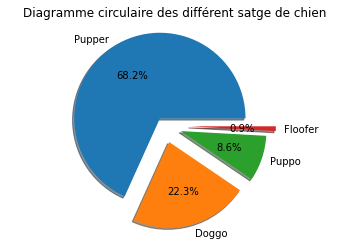

In [130]:
## Déssin du diagramme circulaire
plt.pie(ma_df,
       labels = ['Pupper', 'Doggo', 'Puppo', 'Floofer'],
       autopct = '%1.1f%%', ## pour afficher les pourcentage dans les section
       shadow = True,
       explode = (0.1, 0.2, 0.2, 0.3)
       )
plt.title('Diagramme circulaire des différent stage de chien')
plt.axis('equal')

### Insights:
1. On voit que c'est le satge Pupper qui occupe la majorité  

2. On voit aussi que c'est les stage Floofer qui occupe la minorité 


2. **relation entre le nombre de retweet et le nombre de favoris**

In [131]:
## Définition d'une fonction pour faire le nuage de points
def my_scatters(col1, col2, lab0, lab1, lab2):
    graphe= clean_df_1.plot(x=col1, y=col2, title=lab0, xlabel=lab1, ylabel=lab2, kind='scatter', figsize =(7,6))
    return graphe

<AxesSubplot:title={'center':'Nuage de point entre le nombre de retweet et le nombre de favoris'}, xlabel='Nombre de retweet', ylabel='Nombre de favoris'>

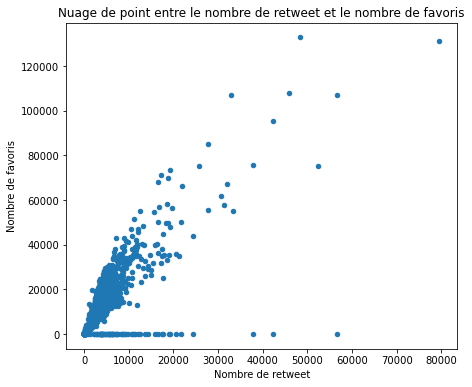

In [132]:
## Application de la fonction
my_scatters('retweet_count','favorite_count','Nuage de point entre le nombre de retweet et le nombre de favoris',
            'Nombre de retweet','Nombre de favoris')

**Insight**: 
1. Il y a une forte corrélation positve entre le nombre de retweet et le nombre de favoris

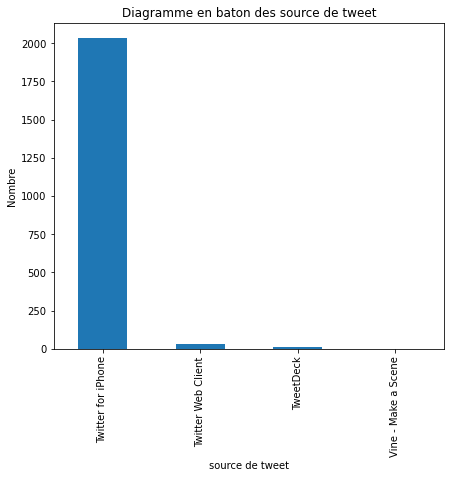

In [133]:
## Diagrammen en baton des différent source de tweet
clean_df_1.source.value_counts().plot(kind='bar',figsize =(7,6))
plt.title ('Diagramme en baton des source de tweet')
plt.xlabel ('source de tweet')
plt.ylabel ('Nombre')
plt.show ()

**Insight**: 
1. On voit que la plus part des tweet viennent des IPhones